In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt   
import folium 
import seaborn as sns 
plt.style.use('seaborn')
import plotly.express as px
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
house = pd.read_csv('kc_house_data.csv')

In [5]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [9]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Adding Additional Columns that are interesting / Removing obvious unneeded columns

In [15]:
house['price_per_sqft'] = house['price'] / house['sqft_living']

In [17]:
house.drop(columns = ['id','date'], axis=1, inplace=True)

In [63]:
len(house.query('yr_renovated != 0'))/len(house)

0.035513165237684545

In [ ]:
#only 3.5% of houses have been renovated, remove column
house.drop(columns = ['yr_renovated'], axis=1, inplace=True)

In [67]:
#37% of houses have besmensts, keep column
len(house.query('sqft_basement != 0'))/len(house)

0.37456242707117854

In [65]:
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,188.050847
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,209.338521
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,233.766234
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,308.163265
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,303.571429


# Removing Outliers 

In [59]:
#remove price outliers outside of 2 standard diviations
#Only want to compare and predice simillar priced houses

z_scores_price = stats.zscore(house.price)
abs_z_scores_price = np.abs(z_scores_price)
filtered_entries_price = (abs_z_scores_price < 2)
house = house[filtered_entries_price]

In [60]:
house.price.mean()

458130.8362335752

In [23]:
#removing Bedroom Outliers
house.bedrooms.value_counts()

3     9666
4     6469
2     2744
5     1392
6      238
1      199
7       32
0       12
8        9
9        4
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [ ]:
#Droping Bedroom outliers, house with 33, 11 ,10 ,9, 8 , and 0 bedrooms 

house.drop(house.loc[house['bedrooms'] == 33 ].index, inplace=True)
house.drop(house.loc[house['bedrooms'] == 11 ].index, inplace=True)
house.drop(house.loc[house['bedrooms'] == 10 ].index, inplace=True)
house.drop(house.loc[house['bedrooms'] == 9 ].index, inplace=True)
house.drop(house.loc[house['bedrooms'] == 8 ].index, inplace=True)
house.drop(house.loc[house['bedrooms'] == 0 ].index, inplace=True)

In [28]:
#Droping Bathroom outliers, houses with 5, 1.25, 4.75, .5, 0, 5.25, 5.5, 6.5, 6.0, 6.75, and 5.75 bathrooms 
house.bathrooms.value_counts()

2.50    5269
1.00    3849
1.75    3029
2.25    1988
2.00    1916
1.50    1439
2.75    1131
3.00     689
3.50     585
3.25     462
3.75     101
4.00      82
0.75      71
4.50      54
4.25      37
5.00       9
1.25       8
4.75       5
0.50       4
0.00       3
5.25       3
5.50       2
6.50       1
6.00       1
6.75       1
5.75       1
Name: bathrooms, dtype: int64

In [ ]:
house.drop(house.loc[house['bathrooms'] == 5.00 ].index, inplace=True)
house.drop(house.loc[house['bathrooms'] == 1.25].index, inplace=True)
house.drop(house.loc[house['bathrooms'] == 4.75 ].index, inplace=True)
house.drop(house.loc[house['bathrooms'] == 0.50 ].index, inplace=True)
house.drop(house.loc[house['bathrooms'] == 0.00 ].index, inplace=True)
house.drop(house.loc[house['bathrooms'] == 5.25 ].index, inplace=True)
house.drop(house.loc[house['bathrooms'] == 5.50 ].index, inplace=True)
house.drop(house.loc[house['bathrooms'] == 6.50 ].index, inplace=True)
house.drop(house.loc[house['bathrooms'] == 6.00 ].index, inplace=True)
house.drop(house.loc[house['bathrooms'] == 6.75 ].index, inplace=True)
house.drop(house.loc[house['bathrooms'] == 5.75 ].index, inplace=True)

In [32]:
# Remove floor outliers
house.floors.value_counts()

1.0    10488
2.0     7658
1.5     1855
3.0      576
2.5      119
3.5        6
Name: floors, dtype: int64

In [ ]:
#Romove hosese with 3.5 floors
house.drop(house.loc[house['floors'] == 3.5 ].index, inplace=True)

In [55]:
#Ensure all outliers have been dropped with scatterplots
cols_to_plot = house[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price_per_sqft']]

Graph for Price: Total = 3625


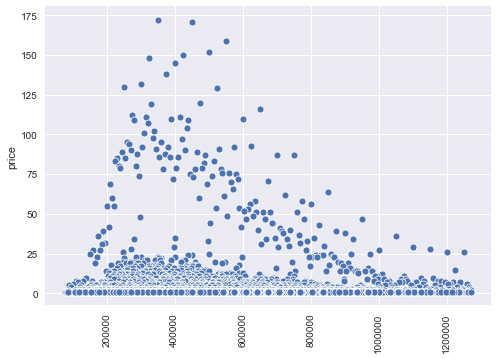

Graph for Bedrooms: Total = 7


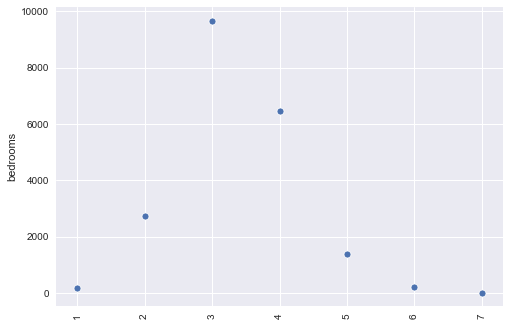

Graph for Bathrooms: Total = 15


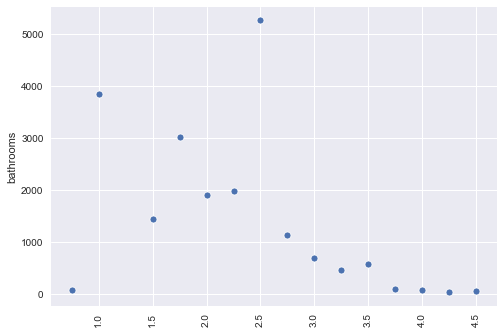

Graph for Sqft_living: Total = 908


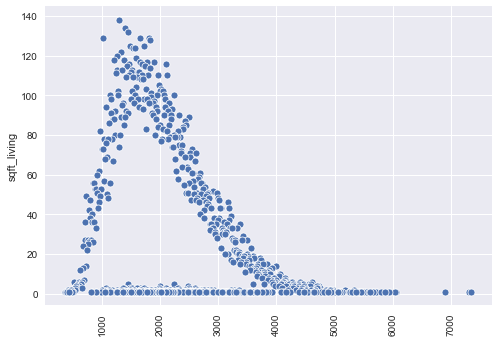

Graph for Sqft_lot: Total = 9378


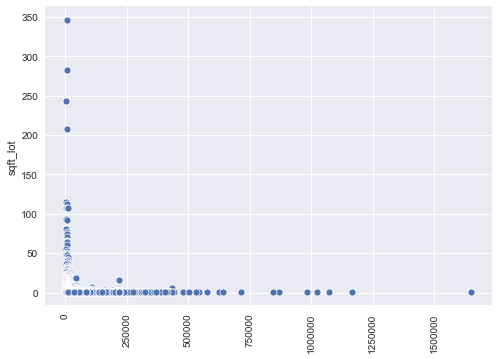

Graph for Floors: Total = 5


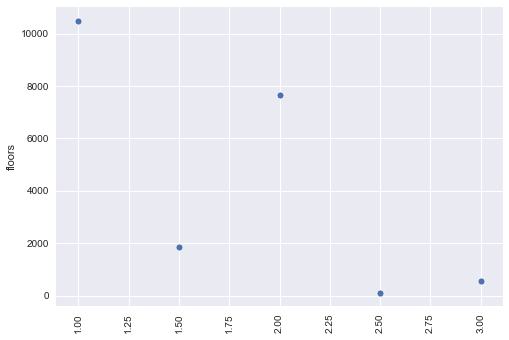

Graph for Waterfront: Total = 2


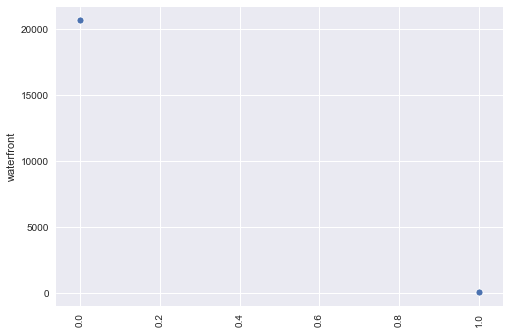

Graph for View: Total = 5


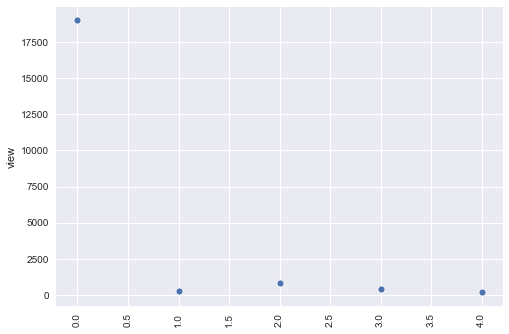

Graph for Condition: Total = 5


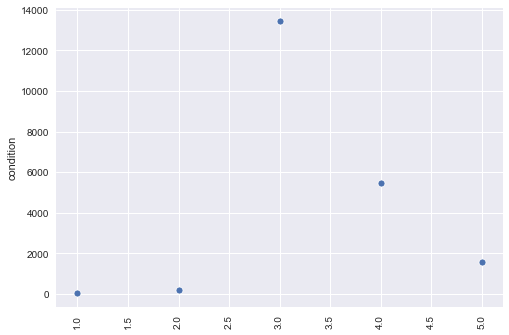

Graph for Grade: Total = 10


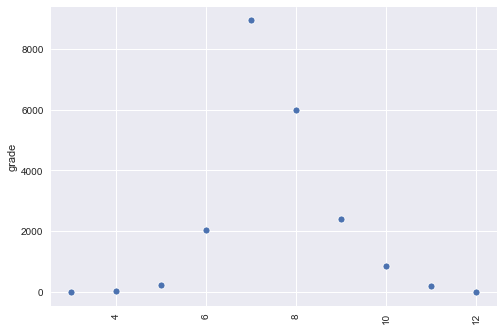

Graph for Sqft_above: Total = 843


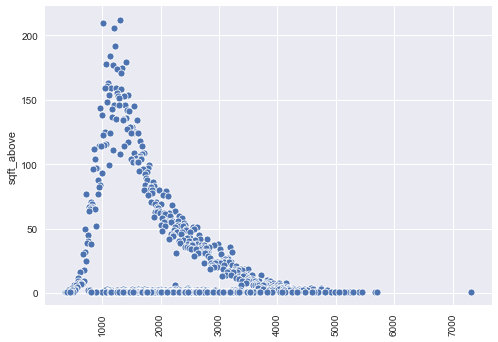

Graph for Sqft_basement: Total = 271


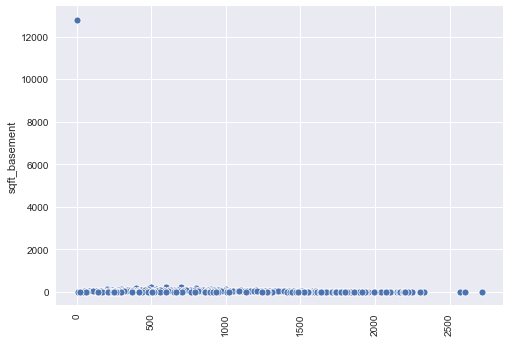

Graph for Yr_built: Total = 116


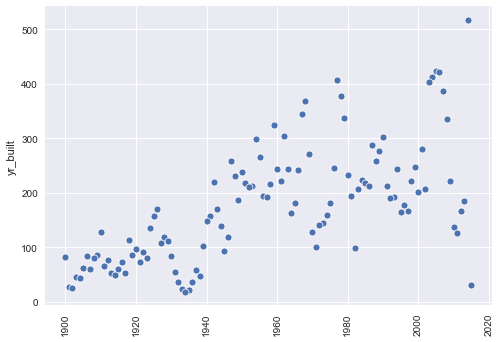

Graph for Yr_renovated: Total = 70


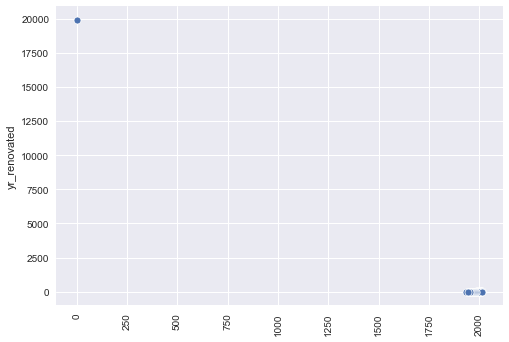

Graph for Zipcode: Total = 70


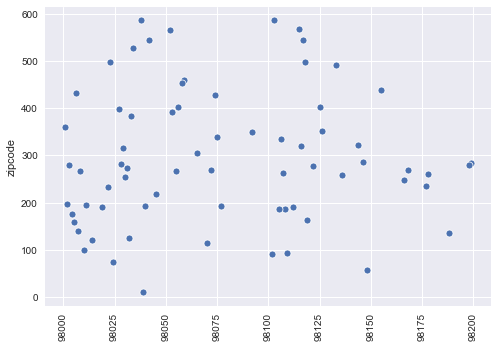

Graph for Lat: Total = 5019


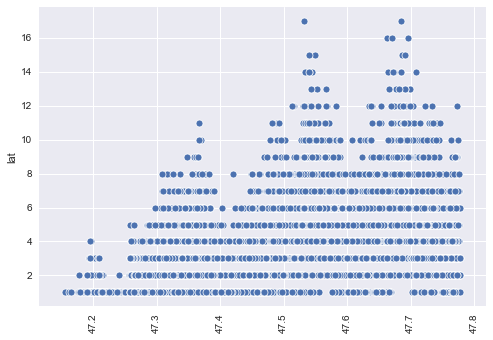

Graph for Long: Total = 749


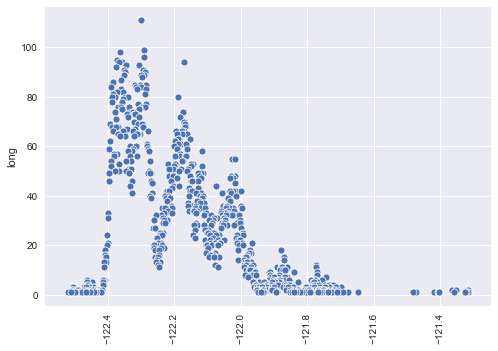

Graph for Sqft_living15: Total = 736


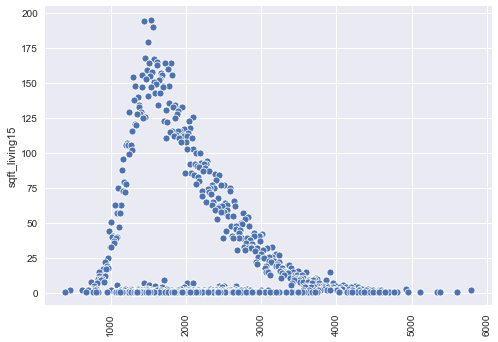

Graph for Sqft_lot15: Total = 8290


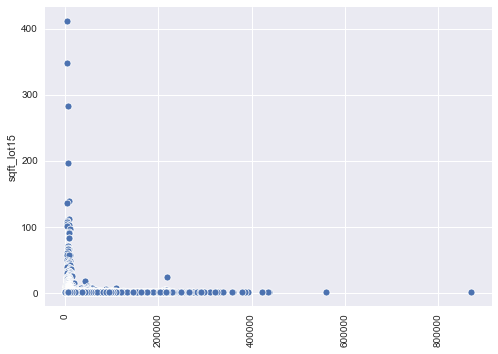

Graph for Price_per_sqft: Total = 15855


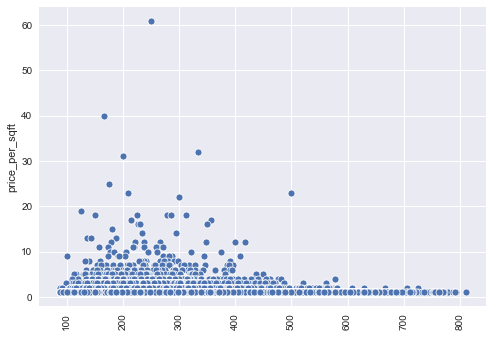

In [61]:
def plot_scatterplots():
    for i in cols_to_plot.columns:
        cat_num = cols_to_plot[i].value_counts()
        print('Graph for {}: Total = {}'.format(i.capitalize(), len(cat_num)))
        sns.scatterplot(x=cat_num.index, y=cat_num)
        plt.xticks(rotation=90)
        plt.show()
        
plot_scatterplots()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8433fc5c50>,
      dtype=object)

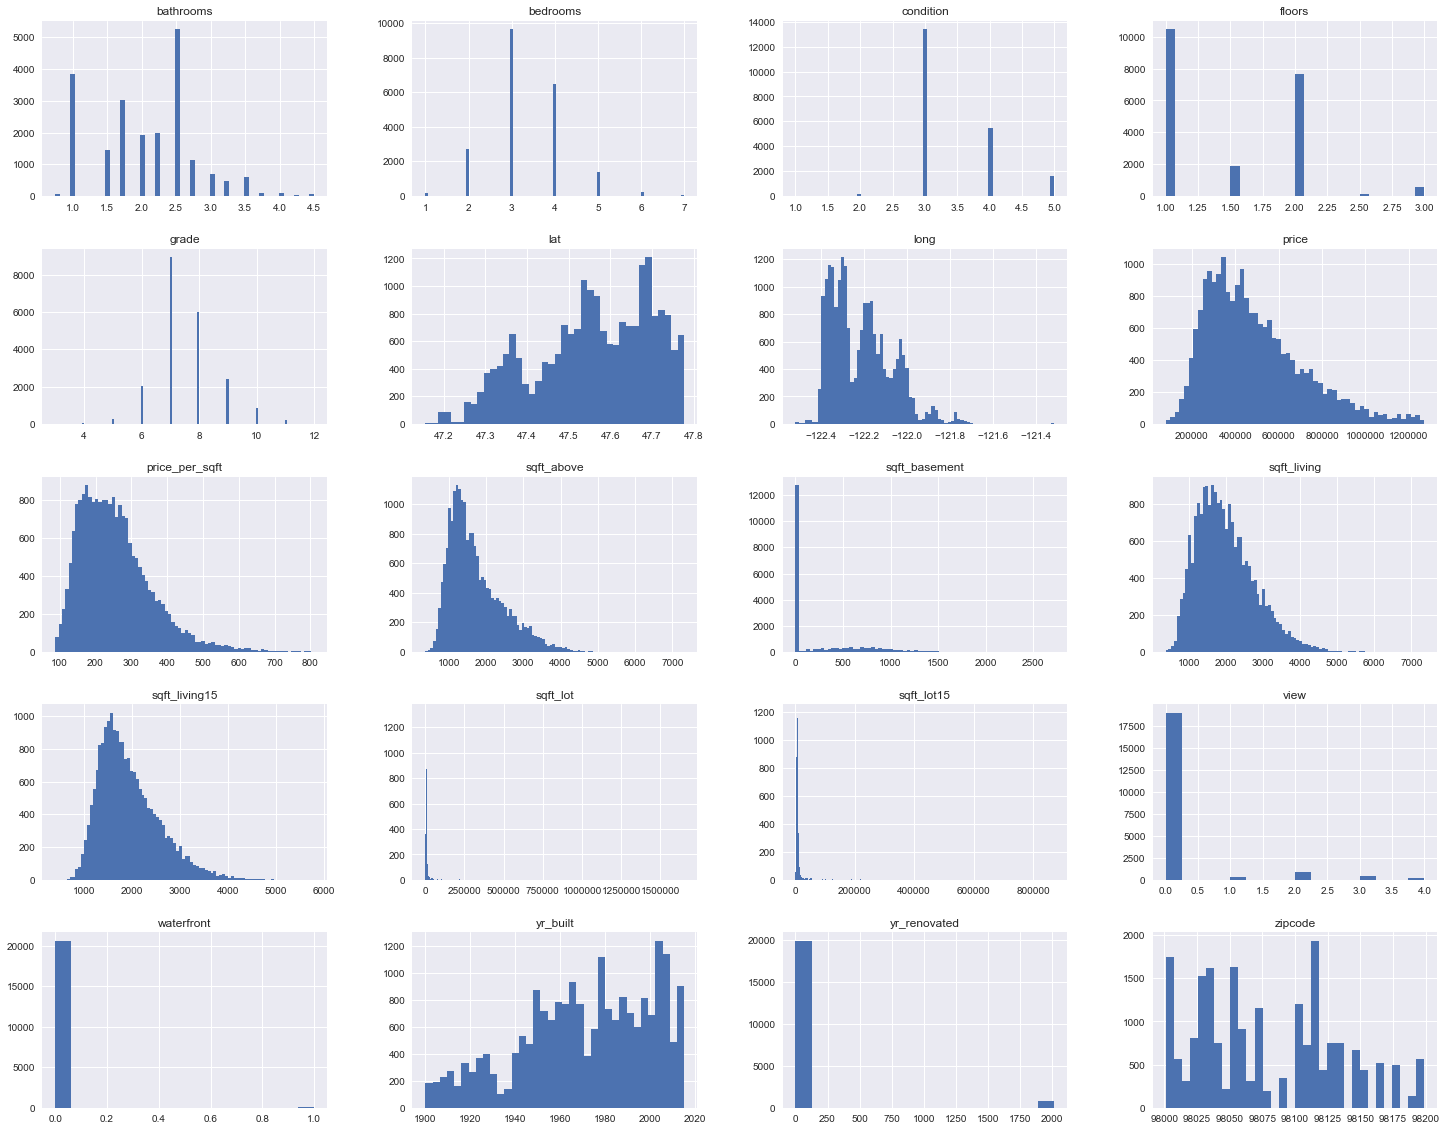

In [40]:
house.hist(figsize=(25,20), bins='auto')

In [68]:
house.to_csv('house_clean.csv')